# Examining Fasta from Assembly

Note that the fasta file is not within the repository as it is greater than 100MB. A zipped version is. Geoduck-transcriptome-v2.fasta.zip
(this is a modified file from paper-pano-go/jupyter-nbs/01-Geoduck-fasta.ipynb) in order to process 
Geoduck-transcriptome-v3.fa
file

In [4]:
ls ../panopea_data/data-results/*.fa*

../panopea_data/data-results/Geoduck-transcriptome-v2.fasta*
../panopea_data/data-results/Geoduck-transcriptome-v3.fa
../panopea_data/data-results/blastout_query.part-01.fasta_sp.txt*


In [6]:
!head ../panopea_data/data-results/Geoduck-transcriptome-v3.fa

>comp100000_c0_seq1
TGAATGTATGTTTGTGAACGTATGTATATGAATGTATGTATGTGAATGCATACCATCTGTATAAGTATAATCCGACCGGGAGATGTTTATTCACACAGTTTGGCATTATGACGTTTAACCTCTGAATTGGCGTCTCTTGCTACTGACCGCTTCACAGTGATGACCCATGTTGTCACTTCTAATCTATTTATGTATTGCTCTTTTATATTATACTATTAACGCTGTTAAAATACACTACCGCTAAACAAATAAGAGTTGTGGGTTTGAATCATTGGTGAGTGCAGGAACCTCAGCAGGTCATTAAGATTTACGTGTACGTCTATCCTAAACCTACATGTTTCAACTTTGTTGTTTTTCGGTTTCGTTCTCTGTACACAGCTCTTGAAACATACATAAAATACCATTTTATTAAAAAATATGTCTCTATTTAATGTTAAAACCTTTTTAAGAAAA
>comp100001_c1_seq1
GCTTTACCAGTTGTTACAAACATTTTAATAGTTATAGTTAATATACACAACATTTTAAATTAACTAGTGTCGAGAACTTGAGTCGGACATAGAGAATTAAATGTTTGTTGAACTTTAGCCAAGCACTTTTATTCTATTACTTTTTGAAGTATTTAATACCTTAAAATAATGGAATACTCCTGTAGAGTCCTTGAAGCCATCAACAATTTACCAACCTCCAAATAAAATATGAATATATTTTACATGATGAATTTACATAATGGATATATCATTGATATCTGCCAAGTTAACTTCACCTACCATTTTTAAGCTTACTTTGACCATGTTAGTTGGTATTGTGTATATAACGAGTGGGAGGACATTCATACCTGGCATTTGTTTGGTCAAACTGACACAAGATTTATGTTTATTTCAAACCTATATATAAAACAAGTCTCAATGAATATCTTCCTAGGCACAAGACAATGCTGATAAAATGTCTTGTTCAAGGACA
>comp100001_

In [8]:
!fgrep -c ">" ../panopea_data/data-results/Geoduck-transcriptome-v3.fa

153982


In [10]:
!perl ../panopea_data/scripts/count_fasta.pl \
-i 1000 \
../panopea_data/data-results/Geoduck-transcriptome-v3.fa


0:999 	127468
1000:1999 	18030
2000:2999 	5311
3000:3999 	1808
4000:4999 	772
5000:5999 	284
6000:6999 	139
7000:7999 	86
8000:8999 	21
9000:9999 	33
10000:10999 	7
11000:11999 	6
12000:12999 	3
13000:13999 	4
14000:14999 	4
15000:15999 	3
16000:16999 	0
17000:17999 	2
18000:18999 	1

Total length of sequence:	101695908 bp
Total number of sequences:	153982
N25 stats:			25% of total sequence length is contained in the 8020 sequences >= 2057 bp
N50 stats:			50% of total sequence length is contained in the 26011 sequences >= 1015 bp
N75 stats:			75% of total sequence length is contained in the 64307 sequences >= 446 bp
Total GC count:			37565860 bp
GC %:				36.94 %



In [11]:
from Bio import SeqIO
from Bio.SeqUtils import GC

from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt 

import numpy as np

In [12]:
input_file = open('../panopea_data/data-results/Geoduck-transcriptome-v3.fa', 'r')
record_id = []
record_cpg = []

secuencias=[]
largo= ()
for record in SeqIO.parse(input_file, "fasta") :
    g= record.seq.count("G")
    c= record.seq.count("C")
    cg= record.seq.count("CG")
    largo = record.name, len(record.seq), GC(record.seq), round(cg/(g*c)*(len(record.seq)**2/(len(record.seq)-1)) ,8)
    secuencias.append(largo)

input_file.close()

In [13]:
secuencias = pd.DataFrame(secuencias, columns=['contigs', 'length', "GC", "CpG"])
secuencias.describe()

,length,GC,CpG
count,153982.000000,153982.000000,153982.000000
mean,660.440233,36.034564,0.547723
std,765.421464,6.727696,0.323846
min,201.000000,13.043478,0.000000
25%,253.000000,31.065620,0.323447
50%,372.000000,34.905660,0.492127
75%,734.000000,40.389972,0.727148
max,18024.000000,84.386617,3.514344


In [14]:
secuencias.to_csv('../panopea_data/data-results/Geoduck-transcriptome-v3Description.csv')

In [15]:
%matplotlib inline

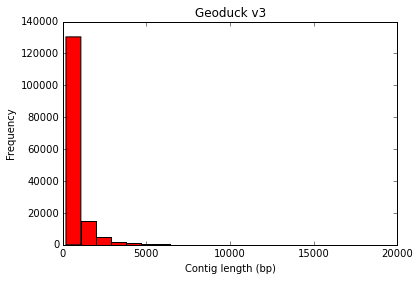

In [18]:
ax= plt.gca()
ax.hist(secuencias['length'], bins=20, color = 'r')
ax.set_xlabel('Contig length (bp)')
ax.set_ylabel('Frequency')
ax.set_title (r"Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3length.png")
plt.show()

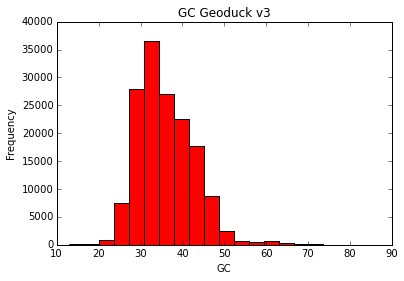

In [19]:
ax= plt.gca()
ax.hist(secuencias['GC'], bins=20, color = 'r')
ax.set_xlabel('GC')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3gc.png")
plt.show()

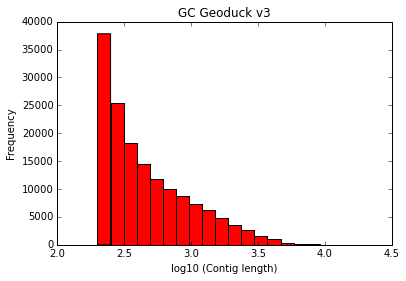

In [20]:
ax= plt.gca()
ax.hist(np.log10(secuencias['length']), bins=20, color = 'r')
ax.set_xlabel('log10 (Contig length)')
ax.set_ylabel('Frequency')
ax.set_title (r"GC Geoduck v3")
plt.savefig("../img/Geoduck-transcriptome-v3loglength.png")
plt.show()

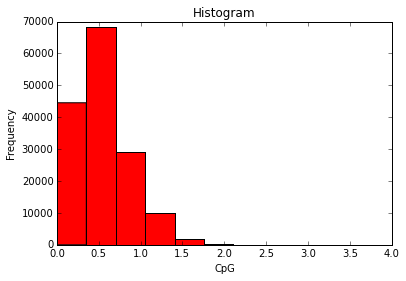

In [21]:
ax = plt.gca()
# the histogram of the data
ax.hist(secuencias['CpG'],bins=10, color='r')

ax.set_xlabel('CpG')
ax.set_ylabel('Frequency')
ax.set_title(r'Histogram' )
plt.savefig("../img/Geoduck-transcriptome-v3CpG.png")
plt.show()